In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
unis           = pd.read_csv('../data/IPEDS/university_info/hd2020.csv', encoding='cp1252')
fnames         = glob('../data/IPEDS/*_A/*_rv.csv')+glob('../../data/IPEDS/*_a.csv')
fnames         = [fname for fname in fnames if ('2000' not in fname) and ('2001' not in fname)]
dfs            = [pd.read_csv(fname, index_col=0) for fname in fnames]
dfs            = [df.rename(columns={col: col.upper().strip() for col in df.columns}) for df in dfs]
dfs            = [df[df['AWLEVEL']==5] for df in dfs]
cs_maps        = [df['CIPCODE'].apply(lambda x: (x>=11) & (x<12)) for df in dfs]
cs_maps        = [cs_map.rename('CS') for cs_map in cs_maps] 
cs_and_noncs   = [df.groupby([cs_maps[i], df.index]).sum().reset_index() for i, df in enumerate(dfs)]
years          = [int(fname.split('/')[-1].split('_')[0][1:]) for fname in fnames]
cs_and_noncs   = sorted(zip(years, cs_and_noncs), key=lambda x: x[0])

In [19]:
var, var_alt   = 'CTOTALW', 'CRACE16' 
women_abs      = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
women_abs      = pd.concat(women_abs, axis=1).transpose()

var, var_alt   = 'CBKAAT', 'CRACE18' 
black_abs      = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
black_abs      = pd.concat(black_abs, axis=1).transpose()

var, var_alt   = 'CHISPT', 'CRACE21'
hispanic_abs   = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
hispanic_abs   = pd.concat(hispanic_abs, axis=1).transpose()

var, var_alt   = 'CAIANT', 'CRACE19'
natives_abs    = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
natives_abs    = pd.concat(natives_abs, axis=1).transpose()

women_abs    = women_abs[3:9]
black_abs    = black_abs[3:9]
hispanic_abs = hispanic_abs[3:9]

In [55]:
var, var_alt   = 'CTOTALW', 'CRACE16' 
women_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())      if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()   if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]


var, var_alt   = 'CBKAAT', 'CRACE18' 
black_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())       if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()    if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]


var, var_alt   = 'CHISPT', 'CRACE21'
hispanic_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())       if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()    if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]


var, var_alt   = 'CAIANT', 'CRACE19'
natives_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())       if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()    if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]

women_pct      = pd.concat(women_pct, axis=1).transpose()[3:9]
black_pct      = pd.concat(black_pct, axis=1).transpose()[3:9]
hispanic_pct   = pd.concat(hispanic_pct, axis=1).transpose()[3:9]
natives_pct    = pd.concat(natives_pct, axis=1).transpose()[3:9]

## Plot absolute counts and percentages

In [20]:
from scipy.stats import pearsonr, spearmanr

In [21]:

r_w_cs  = pearsonr(women_abs[True].values, women_abs[True].index.values)[0].round(2)
r_w_ncs = pearsonr(women_abs[False].values, women_abs[False].index.values)[0].round(2)

r_b_cs  = pearsonr(black_abs[True].values, black_abs[True].index.values)[0].round(2)
r_b_ncs = pearsonr(black_abs[False].values, black_abs[False].index.values)[0].round(2)

r_h_cs  = pearsonr(hispanic_abs[True].values, hispanic_abs[True].index.values)[0].round(2)
r_h_ncs = pearsonr(hispanic_abs[False].values, hispanic_abs[False].index.values)[0].round(2)

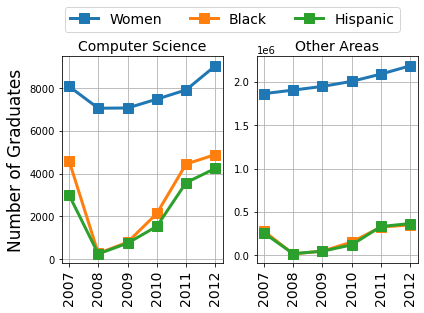

In [80]:
fig, axs       = plt.subplots(1, 2, figsize=(6,4), sharex=True, sharey=False)

axs[0].plot(women_abs[True], linewidth=3, marker='s', markersize=10)
axs[0].plot(black_abs[True], linewidth=3, marker='s', markersize=10)
axs[0].plot(hispanic_abs[True], linewidth=3, marker='s', markersize=10)

axs[0].set_title('Computer Science', \
                 color='black', fontsize=14);
# axs[0].set_yscale('log');
axs[0].grid();

axs[1].plot(women_abs[False], linewidth=3, marker='s', markersize=10)
axs[1].plot(black_abs[False], linewidth=3, marker='s', markersize=10)
axs[1].plot(hispanic_abs[False], linewidth=3, marker='s', markersize=10)

axs[1].set_title('Other Areas', \
                 color='black', fontsize=14);
# axs[1].set_yscale('log');
axs[1].grid();


# _ = [axs[0][1].plot(df, linewidth=3, marker='s') for df in [women_abs[False], black_abs[False], hispanic_abs[False]]]
axs[0].set_xticks(range(3, 9), range(2007, 2013), rotation=90, fontsize=14);
axs[1].set_xticks(range(3, 9), range(2007, 2013), rotation=90, fontsize=14);
# axs[2].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
# axs[0][1].set_title('Non-CS Programs', color='black', fontsize=14);

fig.legend(['Women', 'Black', 'Hispanic'], ncol=3, fontsize=14, bbox_to_anchor=(0.95, 1.1))
# axs[1].legend(['Non-CS', 'CS',], ncol=2, fontsize=11);

axs[0].set_ylabel('Number of Graduates', color='black', fontsize=17);
plt.tight_layout()

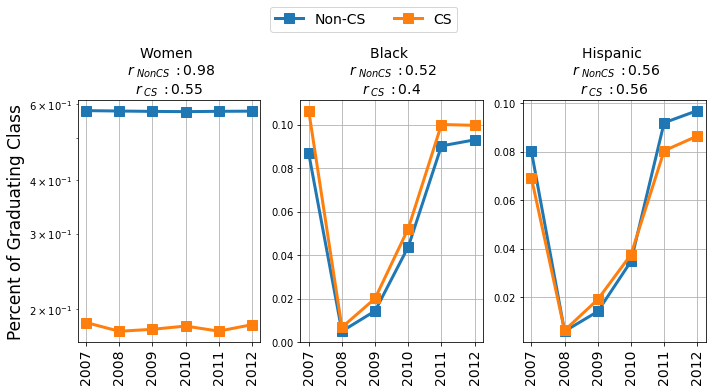

In [59]:

fig, axs       = plt.subplots(1, 3, figsize=(10,5), sharex=True, sharey=False)

axs[0].plot((women_pct[False]), linewidth=3, marker='s', markersize=10)
axs[0].plot((women_pct[True]), linewidth=3, marker='s', markersize=10)
axs[0].set_title('Women \n $r_{~NonCS~}: $%s \n$r_{~CS~}: $%s' % (r_w_ncs, r_w_cs), \
                 color='black', fontsize=14);
axs[0].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
axs[0].set_yscale('log');

axs[1].plot(black_pct[False], linewidth=3, marker='s', markersize=10)
axs[1].plot(black_pct[True], linewidth=3, marker='s', markersize=10)
axs[1].set_title('Black \n $r_{~NonCS~}: $%s \n$r_{~CS~}: $%s' % (r_b_ncs, r_b_cs), \
                 color='black', fontsize=14);
# axs[1].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
# axs[1].set_yscale('log');

axs[2].plot(hispanic_pct[False], linewidth=3, marker='s', markersize=10)
axs[2].plot(hispanic_pct[True], linewidth=3, marker='s', markersize=10)
axs[2].set_title('Hispanic \n $r_{~NonCS~}: $%s \n$r_{~CS~}: $%s' % (r_h_ncs, r_h_cs), \
                 color='black', fontsize=14);
# axs[2].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
# axs[2].set_yscale('log');
# axs[1][0].set_title('CS Programs', color='black', fontsize=14);
# axs[0].legend(['Women', 'Black', 'Hispanic', 'Native American']);

# axs[1].set_xticks(range(len(years)), sorted(years), rotation=90);
# axs[1][1].set_title('Non-CS Programs', color='black', fontsize=14);
# axs[1].legend(['Women', 'Black', 'Hispanic', 'Native American']);

# axs[1][0].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
# axs[1][1].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
axs[0].set_xticks(range(3, 9), range(2007, 2013), rotation=90, fontsize=14);
axs[1].set_xticks(range(3, 9), range(2007, 2013), rotation=90, fontsize=14);
axs[2].set_xticks(range(3, 9), range(2007, 2013), rotation=90, fontsize=14);

axs[0].grid();
axs[1].grid();
axs[2].grid();
# fig.legend(['Women', 'Black', 'Hispanic or Latino'], ncol=4, fontsize=14, bbox_to_anchor=(0.8, 1.05))

axs[0].set_ylabel('Percent of Graduating Class', color='black', fontsize=17);
# axs[1][0].set_xlabel('\nYear', color='black', fontsize=16);
# axs[1][1].set_xlabel('\nYear', color='black', fontsize=16);

# axs[1][0].set_ylim(0, 0.65);
# axs[1][1].set_ylim(0, 0.65);
fig.legend(['Non-CS', 'CS',], ncol=2, fontsize=14, bbox_to_anchor=(0.65, 1.1))

plt.tight_layout();